# Introduction

We have been tasked to analyse the datasets provided (Indian Start-up Funding 2018-2021)

In [107]:
## Load appropriate packages
import warnings
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Ignoring Warnings that might arise throughout the project

warnings.filterwarnings('ignore')

### Loading the 2018 Dataset and Cleaning It

In [4]:
#using Pandas to load the csv file needed to be cleaned

df_18 = pd.read_csv('startup_funding2018.csv')

In [5]:
#Taking a Glimpse of the Dataset

df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [6]:
#Looking at the number of rows and the number of columns in the 2018 Dataset

df_18.shape

(526, 6)

In [7]:
# Getting some statistical values from the dataset 

df_18.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


In [8]:
# Looking at the Column Names of the dataset

df_18.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [9]:
# The 'Location' column was in the format, 'City, Region, Country', but we needed only the 'City' aspect of the value
# Thus taking all character until we reach a comma sign

df_18["Location"] = df_18['Location'].str.split(',').str[0]

In [10]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Bengaluru

bengaluru = df_18.loc[df_18['Location'] == 'Bengaluru'].count()

# Testing whether there are any such occurence of the city Bengaluru

if(bengaluru['Location'].sum() > 0):
    
    # Replacing the all occurances of Bengaluru and Bangalore City as Bangalore
    
    df_18['Location'] = df_18['Location'].str.replace('Bengaluru','Bangalore')
    df_18['Location'] = df_18['Location'].str.replace('Bangalore City','Bangalore')

In [11]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Gurugram

gurugram = df_18.loc[df_18['Location'] == 'Gurugram'].count()

# Testing whether there are any such occurence of the city Bengaluru

if(gurugram['Location'].sum() > 0):
    
    # Replacing the all occurances of Gurugram as Gurgaon
    
    df_18['Location'] = df_18['Location'].str.replace('Gurugram','Gurgaon')

In [12]:
# This is for looking for columns with City New Delhi

delhi = df_18.loc[df_18['Location'] == 'New Delhi'].count()

# Testing whether there are any such occurence of the city New Delhi

if(delhi['Location'].sum() > 0):
    # Replacing the all occurances of Gurugram as Gurgaon
    
    df_18['Location'] = df_18['Location'].str.replace('New Delhi','Delhi')

In [13]:
# Renaming columns so that it matches with that of the other year's dataset

df_18.rename(columns = {'Company Name':'Company/Brand',
                        'Industry':'Sector',
                        'Amount':'Amount($)',
                        'Location':'HeadQuarter',
                        'About Company':'What it does'}, 
             inplace = True)

In [14]:
# Verifying the renaming of columns 

df_18.columns

Index(['Company/Brand', 'Sector', 'Round/Series', 'Amount($)', 'HeadQuarter',
       'What it does'],
      dtype='object')

In [15]:
df_18

,Company/Brand,Sector,Round/Series,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000",Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000",Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000",Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [16]:
# Adding a new column called Funding Year, so that when the four datasets are merged later, 
# it will be easier to associate each row to its year of funding

df_18.insert(5,"Funding Year", 2018)

In [17]:
# Rearranging the columns to correspond to that of the 
df_18 = df_18.reindex(columns=['Company/Brand',
                               'HeadQuarter', 
                               'Sector', 
                               'What it does',
                               'Amount($)',
                               'Funding Year'])

In [18]:
# After careful examination, the Amount column is supposed to be in USD but there are some that in Indian Rupees (INR)

rupees = df_18[df_18["Amount($)"].str.startswith("₹")]

# Displaying all rows with the INR sign
rupees

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
1,Happy Cow Dairy,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,"₹40,000,000",2018
2,MyLoanCare,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,"₹65,000,000",2018
6,Tripshelf,Kalkaji,"Internet, Leisure, Marketplace",Tripshelf is an online market place for holida...,"₹16,000,000",2018
7,Hyperdata.IO,Hyderabad,Market Research,Hyperdata combines advanced machine learning w...,"₹50,000,000",2018
15,Pitstop,Bangalore,"Automotive, Search Engine, Service Industry",Pitstop offers general repair and maintenance ...,"₹100,000,000",2018
...,...,...,...,...,...,...
513,Nykaa,Mumbai,"Beauty, Fashion, Wellness",Nykaa.com is a premier online beauty and welln...,"₹1,130,000,000",2018
514,Chaayos,Delhi,"Food and Beverage, Restaurants, Tea",Chaayos was born in November 2012 out of this ...,"₹810,000,000",2018
516,LT Foods,Delhi,"Food and Beverage, Food Processing, Manufacturing",LT Foods believe that nature will continue to ...,"₹1,400,000,000",2018
517,Multibashi,Bangalore,"E-Learning, Internet",Free language learning platform.,"₹10,000,000",2018


In [21]:
# Since the rupee values need to be converted to USD, there is a site that gives the yearly historic exchange rate of currencies
# against the USD. 

# Downloaded the yearly historical exchange rate for the years 2018-2021 
# from https://data.oecd.org/conversion/exchange-rates.htm 

# Loading the yearly historical exchange rate for the years 2018-2021

exchange_rate = pd.read_csv('historic_exchange_rate.csv')

# Displaying the values from the .csv

exchange_rate

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,2018,1.338412,NaN
1,AUS,EXCH,TOT,NATUSD,A,2019,1.438507,NaN
2,AUS,EXCH,TOT,NATUSD,A,2020,1.453085,NaN
3,AUS,EXCH,TOT,NATUSD,A,2021,1.331224,NaN
4,AUT,EXCH,TOT,NATUSD,A,2018,0.846773,NaN
...,...,...,...,...,...,...,...,...
251,CMR,EXCH,TOT,NATUSD,A,2021,554.530675,NaN
252,SEN,EXCH,TOT,NATUSD,A,2018,555.446458,NaN
253,SEN,EXCH,TOT,NATUSD,A,2019,585.911013,NaN
254,SEN,EXCH,TOT,NATUSD,A,2020,575.586005,NaN


In [22]:
# Filtering for the dataset concerning India

indian_usd_rate = exchange_rate.loc[exchange_rate['LOCATION'] == 'IND']

# Displaying rows for INR/USD yearly exchange rate for the years 2018-2021

indian_usd_rate

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
140,IND,EXCH,TOT,NATUSD,A,2018,68.389467,NaN
141,IND,EXCH,TOT,NATUSD,A,2019,70.420341,NaN
142,IND,EXCH,TOT,NATUSD,A,2020,74.099567,NaN
143,IND,EXCH,TOT,NATUSD,A,2021,73.918013,NaN


In [23]:
# Selecting specifically the value for the exchange rate between INR and USD for the year 2018

value = exchange_rate.query("LOCATION == 'IND' and TIME == 2018")

In [24]:
# Converting value returned into a float for currency conversion later on

rate_value = float(value['Value'])

In [25]:
# Creating a column that would be used as a temporary holding column to help indicate whether a value on the Amount($) column 
# is in INR, USD or -

df_18['Amount(USD)'] = ''

In [26]:
# If the Amount($) starts with ₹, it would be represented by the 'R' on the newly created column
df_18.loc[df_18['Amount($)'].str.startswith("₹"), 'Amount(USD)'] = 'R'

# If the Amount($) starts with $, it would be represented by the 'U' on the newly created column
df_18.loc[df_18['Amount($)'].str.startswith("$"), 'Amount(USD)'] = 'U'

# If the Amount($) is —, it would be represented by the 'E' on the newly created column
df_18.loc[df_18['Amount($)'] == "—", 'Amount(USD)'] = 'E'

In [27]:
# Striping off the values in Amount($), the currency signs (₹ and $)

df_18.loc[df_18['Amount($)'].str.startswith("₹"), 'Amount($)'] = df_18['Amount($)'].str[1:]
df_18.loc[df_18['Amount($)'].str.startswith("$"), 'Amount($)'] = df_18['Amount($)'].str[1:]

# Assigning 1.0 to the rows that have "-" as value

df_18.loc[df_18['Amount($)'].str.startswith("—"), 'Amount($)'] = '1.0'

In [28]:
# Removing all commas from the values of Amount($)

df_18.loc[df_18['Amount($)'].str.contains(',', regex=True), 'Amount($)'] = df_18['Amount($)'].str.replace(',','')

In [29]:
# Now that the Amount($) is void of any non numerical characters, Converting the column to a float

df_18['Amount($)'] = df_18['Amount($)'].astype(float)

In [30]:
# Selecting all amount that had the INR sign on them to its USD equivalence using the value from the yearly historic exchange
# rate, making reference to the Amount(USD) table that was created above

df_18.loc[df_18['Amount(USD)'] == 'R', 'Amount($)'] = df_18['Amount($)'] / rate_value

In [31]:
# Dropping the temporal column created to make reference to those row that had other currencies other than USD

df_18.drop(columns=['Amount(USD)'], inplace=True)

In [32]:
# A preview of the cleaned dataset for 2018

df_18

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,TheCollegeFever,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",2.500000e+05,2018
1,Happy Cow Dairy,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,5.848854e+05,2018
2,MyLoanCare,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,9.504388e+05,2018
3,PayMe India,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,2.000000e+06,2018
4,Eunimart,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,1.000000e+00,2018
...,...,...,...,...,...,...
521,Udaan,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",2.250000e+08,2018
522,Happyeasygo Group,Haryana,"Tourism, Travel",HappyEasyGo is an online travel domain.,1.000000e+00,2018
523,Mombay,Mumbai,"Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,7.500000e+03,2018
524,Droni Tech,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,5.117747e+05,2018


In [34]:
# Saving the cleaned dataset as prepped_2018.csv. Waiting for other members assigned to the other year's dataset
# So that it would be merged

df_18.to_csv('prepped_2018.csv', index=False)

### Loading the 2020 Dataset and Cleaning It

In [36]:
#using Pandas to load the csv file needed to be cleaned

df_20 = pd.read_csv('startup_funding2020.csv')

In [37]:
#Taking a Glimpse of the Dataset

df_20

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [38]:
# Looking at the Column Names of the dataset

df_20.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9'],
      dtype='object')

In [39]:
# Droping the columns that are not important to our analysis including an unnamed column

df_20.drop(columns=df_20.columns[[1,5,6,8,-1]],  axis=1,  inplace=True)

In [40]:
# Adding a new column called Funding Year, so that when the four datasets are merged later, 
# it will be easier to associate each row to its year of funding

df_20.insert(5,"Funding Year", 2020)

In [41]:
# Verifying the dataset

df_20

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,"$200,000",2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"$100,000",2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Undisclosed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,"$400,000",2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"$340,000",2020
...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,AI enabled marketplace that provides career gu...,"$1,500,000",2020
1051,EpiFi,NaN,Fintech,It offers customers with a single interface fo...,"$13,200,000",2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,"$8,000,000",2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,"$8,043,000",2020


In [42]:
# The 'Location' column was in the format, 'City, Region, Country', but we needed only the 'City' aspect of the value
# Thus taking all character until we reach a comma sign

df_20["HeadQuarter"] = df_20['HeadQuarter'].str.split(',').str[0]

In [43]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Gurugram

gurugram = df_20.loc[df_20['HeadQuarter'] == 'Gurugram'].count()

# Testing whether there are any such occurence of the city Gurugram

if(gurugram['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Gurugram as Gurgaon
    df_20['HeadQuarter'] = df_20['HeadQuarter'].str.replace('Gurugram','Gurgaon')

In [44]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Bengaluru

bengaluru = df_20.loc[(df_20['HeadQuarter'] == 'Bengaluru')].count()

# Testing whether there are any such occurence of the city Bengaluru

if(bengaluru['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Bengaluru and Bangalore City as Bangalore
    
    df_20['HeadQuarter'] = df_20['HeadQuarter'].str.replace('Bengaluru','Bangalore')
    df_20['HeadQuarter'] = df_20['HeadQuarter'].str.replace('Bangalore City','Bangalore')
    df_20['HeadQuarter'] = df_20['HeadQuarter'].str.replace('Banglore','Bangalore')

In [45]:
# This is for looking for columns with City New Delhi

delhi = df_20.loc[df_20['HeadQuarter'] == 'New Delhi'].count()

# Testing whether there are any such occurence of the city New Delhi

if(delhi['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of New Delhi as Delhi
    
    df_20['HeadQuarter'] = df_20['HeadQuarter'].str.replace('New Delhi','Delhi')

In [46]:
# Replacing a wrongly spelt Hyderabad

df_20.loc[df_20['HeadQuarter'] == 'Hyderebad', 'HeadQuarter'] = 'Hyderabad'

In [47]:
df_20[df_20['Amount($)'].isna()]

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
29,Delhivery,Gurgaon,E-commerce,Delhivery is a supply chain services company t...,NaN,2020
44,PointOne Capital,Bangalore,Venture capitalist,Pre-seed/Seed focussed VC investor,NaN,2020
235,Tring,Mumbai,Social Media,"Tring is a celebrity engagement platform, for ...",NaN,2020


In [48]:
# Dropping these rows with null values as it becomes impossible to the run subsequent process

df_20 = df_20[df_20['Amount($)'].notna()]

In [49]:
# Striping off the values in Amount($), the $ currency sign
df_20.loc[df_20['Amount($)'].str.startswith('$'), 'Amount($)'] = df_20['Amount($)'].str[1:]

# Removing all commas from the values of Amount($)
df_20.loc[df_20['Amount($)'].str.contains(',', regex=True), 'Amount($)'] = df_20['Amount($)'].str.replace(',','')

# There was a funding but it was stated as a range, the average of the range was used
df_20.loc[df_20['Amount($)'] == '800000000 to $850000000', 'Amount($)'] = '825000000'

# Assigning all undisclosed amount as 1.0, since there was a funding, it was just not disclosed
# and also taking care of those Undisclosed values that were wrongly spelt
df_20.loc[(df_20['Amount($)'] == 'Undiclsosed') 
          | (df_20['Amount($)'] == 'Undislosed')
          | (df_20['Amount($)'] == 'Undisclosed'), 'Amount($)'] = '1.0'

# Assigning the value 28 million as verified from the site:
# https://techcrunch.com/2020/11/18/payments-app-true-balance-raises-28-million-to-reach-more-underbanked-users-in-india/
df_20.at[465, 'Amount($)'] = '28000000'

In [50]:
# Converting the column Amonut($) to float data type

df_20['Amount($)'] = df_20['Amount($)'].astype(float)

In [52]:
# Saving the cleaned dataset as prepped_2018.csv. Waiting for other members assigned to the other year's dataset
# So that it would be merged

df_20.to_csv('prepped_2020.csv', index=False)

### Loading the 2019 Dataset and Cleaning It

In [54]:
# sing Pandas to load the csv file needed to be cleaned

df_19 = pd.read_csv('startup_funding2019.csv')

In [55]:
#Taking a Glimpse of the Dataset

df_19

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [56]:
# Droping the columns that are not important to our analysis including an unnamed column

df_19.drop(columns=['Founded','Founders','Investor','Stage'], inplace=True)

In [57]:
# Adding a new column called Funding Year, so that when the four datasets are merged later, 
# it will be easier to associate each row to its year of funding

df_19.insert(5,"Funding Year", 2019)

In [58]:
# Verifying the dataset

df_19

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",2019
...,...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,It connects client requirements to their suppl...,"$20,000,000",2019
85,Oyo,Gurugram,Hospitality,Provides rooms for comfortable stay,"$693,000,000",2019
86,GoMechanic,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"$5,000,000",2019
87,Spinny,Delhi,Automobile,Online car retailer,"$50,000,000",2019


In [59]:
# The 'Location' column was in the format, 'City, Region, Country', but we needed only the 'City' aspect of the value
# Thus taking all character until we reach a comma sign

df_19["HeadQuarter"] = df_19['HeadQuarter'].str.split(',').str[0]

In [60]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Gurugram

gurugram = df_19.loc[df_19['HeadQuarter'] == 'Gurugram'].count()

# Testing whether there are any such occurence of the city Gurugram

if(gurugram['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Gurugram as Gurgaon
    df_19['HeadQuarter'] = df_19['HeadQuarter'].str.replace('Gurugram','Gurgaon')

In [61]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Bengaluru

bengaluru = df_19.loc[(df_19['HeadQuarter'] == 'Bengaluru')].count()

# Testing whether there are any such occurence of the city Bengaluru

if(bengaluru['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Bengaluru and Bangalore City as Bangalore
    df_19['HeadQuarter'] = df_19['HeadQuarter'].str.replace('Bengaluru','Bangalore')
    df_19['HeadQuarter'] = df_19['HeadQuarter'].str.replace('Bangalore City','Bangalore')

In [62]:
# This is for looking for columns with City New Delhi

delhi = df_19.loc[df_19['HeadQuarter'] == 'New Delhi'].count()

# Testing whether there are any such occurence of the city New Delhi

if(delhi['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of New Delhi as Delhi
    
    df_19['HeadQuarter'] = df_18['HeadQuarter'].str.replace('New Delhi','Delhi')

In [63]:
# Striping off the values in Amount($), the $ currency sign
df_19.loc[df_19['Amount($)'].str.startswith('$'), 'Amount($)'] = df_19['Amount($)'].str[1:]

# Assigning all undisclosed amount as 1.0, since there was a funding, it was just not disclosed
df_19.loc[df_19['Amount($)'] == 'Undisclosed', 'Amount($)'] = '1.0'

# Removing all commas from the values of Amount($)
df_19.loc[df_19['Amount($)'].str.contains(',', regex=True), 'Amount($)'] = df_19['Amount($)'].str.replace(',','')

In [64]:
#Verifying changes made to dataset
df_19

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,Bombay Shaving,Bangalore,Ecommerce,Provides a range of male grooming products,6300000,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,150000000,2019
2,Eduisfun,Gurgaon,Edtech,It aims to make learning fun via games.,28000000,2019
3,HomeLane,Noida,Interior design,Provides interior designing solutions,30000000,2019
4,Nu Genes,Hyderabad,AgriTech,"It is a seed company engaged in production, pr...",6000000,2019
...,...,...,...,...,...,...
84,Infra.Market,Haryana,Infratech,It connects client requirements to their suppl...,20000000,2019
85,Oyo,Bangalore,Hospitality,Provides rooms for comfortable stay,693000000,2019
86,GoMechanic,Pune,Automobile & Technology,Find automobile repair and maintenance service...,5000000,2019
87,Spinny,Bangalore,Automobile,Online car retailer,50000000,2019


In [65]:
# Converting the column Amonut($) to float data type

df_19['Amount($)'] = df_19['Amount($)'].astype(float)

In [67]:
# Saving the cleaned dataset as prepped_2019.csv. Waiting for other members assigned to the other year's dataset
# So that it would be merged

df_19.to_csv('prepped_2019.csv', index=False)

### Loading the 2021 Dataset and Cleaning It

In [69]:
#using Pandas to load the csv file needed to be cleaned

df_21 = pd.read_csv('startup_funding2021.csv')

In [70]:
#Taking a Glimpse of the Dataset

df_21

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [71]:
# Looking at the Column Names of the dataset

df_21.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [72]:
# Droping the columns that are not important to our analysis including an unnamed column

df_21.drop(columns=df_21.columns[[1,5,6,8]],  axis=1,  inplace=True)

In [73]:
# Adding a new column called Funding Year, so that when the four datasets are merged later, 
# it will be easier to associate each row to its year of funding

df_21.insert(5,"Funding Year", 2021)

In [74]:
# Verifying the dataset

df_21

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"$1,200,000",2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"$120,000,000",2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"$30,000,000",2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"$51,000,000",2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","$2,000,000",2021
...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,$3000000,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,$20000000,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,$55000000,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",$26000000,2021


In [75]:
# The 'Location' column was in the format, 'City, Region, Country', but we needed only the 'City' aspect of the value
# Thus taking all character until we reach a comma sign

df_21["HeadQuarter"] = df_21['HeadQuarter'].str.split(',').str[0]

In [76]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Gurugram

gurugram = df_21.loc[df_21['HeadQuarter'] == 'Gurugram'].count()

# Testing whether there are any such occurence of the city Gurugram

if(gurugram['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Gurugram as Gurgaon
    df_21['HeadQuarter'] = df_21['HeadQuarter'].str.replace('Gurugram','Gurgaon')

In [77]:
# From obersavtion: One notes the use of official and unofficial names of certain cities, which when not rectified
# will not give actual figures relating to a city with such perculiarity. A city with more than one name.

# This is for looking for columns with City Bengaluru

bengaluru = df_21.loc[(df_21['HeadQuarter'] == 'Bengaluru')].count()

# Testing whether there are any such occurence of the city Bengaluru

if(bengaluru['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of Bengaluru and Bangalore City as Bangalore
    df_21['HeadQuarter'] = df_21['HeadQuarter'].str.replace('Bengaluru','Bangalore')
    df_21['HeadQuarter'] = df_21['HeadQuarter'].str.replace('Bangalore City','Bangalore')

In [78]:
# This is for looking for columns with City New Delhi

delhi = df_21.loc[df_21['HeadQuarter'] == 'New Delhi'].count()

# Testing whether there are any such occurence of the city New Delhi

if(delhi['HeadQuarter'].sum() > 0):
    # Replacing the all occurances of New Delhi as Delhi
    df_21['HeadQuarter'] = df_21['HeadQuarter'].str.replace('New Delhi','Delhi')

In [79]:
#Checking for null values

df_21[df_21['Amount($)'].isna()]

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
86,Onsurity,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,NaN,2021
674,MYRE Capital,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,NaN,2021
1100,Sochcast,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",NaN,2021


In [80]:
# Dropping these rows with null values as it becomes impossible to the run subsequent process

df_21 = df_21[df_21['Amount($)'].notna()]

In [81]:
# Striping off the values in Amount($), those starting with $$ currency sign
df_21.loc[df_21['Amount($)'].str.startswith('$$'), 'Amount($)'] = df_21['Amount($)'].str[1:]

# Striping off the values in Amount($), the $ currency sign
df_21.loc[df_21['Amount($)'].str.startswith('$'), 'Amount($)'] = df_21['Amount($)'].str[1:]

# Removing all commas from the values of Amount($)
df_21.loc[df_21['Amount($)'].str.contains(',', regex=True), 'Amount($)'] = df_21['Amount($)'].str.replace(',','')

# Assigning all undisclosed amount as 1.0, since there was a funding, it was just not disclosed
# and also taking care of those Undisclosed values that were uniquely spelt
df_21.loc[(df_21['Amount($)'] == 'Undisclosed')
        | (df_21['Amount($)'] == 'undisclosed'), 'Amount($)'] = '1.0'

In [82]:
# Replacing empty space with null the Amount($) column 
df_21.loc[df_21['Amount($)'].str.contains(' ', regex=True), 'Amount($)'] = df_21['Amount($)'].str.replace(' ','')

# Treating null values as undisclosed amount thus assigning them 1.0 per our convention
df_21.loc[(df_21['Amount($)'] == ''), 'Amount($)'] = '1.0'

# Rectifying the values that had other characters other than figures
df_21['Amount($)']=[re.sub('[^\w\s]+', '', s) for s in df_21['Amount($)'].tolist()]

In [83]:
df_21.drop(df_21[(df_21['Amount($)'].str.isalpha())].index , inplace=True)

In [84]:
#df_21.loc[df_21['Amount($)'] == '']
#df_21.drop([1137,1146] , inplace=True)

In [85]:
# Converting the Amount($) as a float data type

df_21['Amount($)'] = df_21['Amount($)'].astype(float)

In [86]:
#Verifying the changes made to the dataset

df_21

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,120000000.0,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,30000000.0,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,51000000.0,2021
4,FypMoney,Gurgaon,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,2021
...,...,...,...,...,...,...
1204,Gigforce,Gurgaon,Staffing & Recruiting,A gig/on-demand staffing company.,3000000.0,2021
1205,Vahdam,Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,20000000.0,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,55000000.0,2021
1207,CollegeDekho,Gurgaon,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0,2021


In [88]:
# Saving the cleaned dataset as prepped_2019.csv. Waiting for other members assigned to the other year's dataset
# So that it would be merged

df_21.to_csv('prepped_2021.csv', index=False)

### Merging the Prepped Datasets

In [90]:
# Declaring dataframes to read the prepped csv from above

# Laoding prepped 2018 dataset
df1 = pd.read_csv('prepped_2018.csv')
# Laoding prepped 2019 dataset
df2 = pd.read_csv('prepped_2019.csv')
# Laoding prepped 2020 dataset
df3 = pd.read_csv('prepped_2020.csv')
# Laoding prepped 2021 dataset
df4 = pd.read_csv('prepped_2021.csv')

In [91]:
dataset = [df1,df2,df3,df4]

# Merging the prepped datasets into a merged dataframe
merged_data = pd.concat(dataset, ignore_index=True)

In [92]:
# Peeking at the merged data

merged_data

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Funding Year
0,TheCollegeFever,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",2.500000e+05,2018
1,Happy Cow Dairy,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,5.848854e+05,2018
2,MyLoanCare,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,9.504388e+05,2018
3,PayMe India,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,2.000000e+06,2018
4,Eunimart,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,1.000000e+00,2018
...,...,...,...,...,...,...
2858,Gigforce,Gurgaon,Staffing & Recruiting,A gig/on-demand staffing company.,3.000000e+06,2021
2859,Vahdam,Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,2.000000e+07,2021
2860,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,5.500000e+07,2021
2861,CollegeDekho,Gurgaon,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",2.600000e+07,2021


In [95]:
# Saving the merged data in another csv

merged_data.to_csv('merged_dataset.csv', index=False)

In [96]:
merged_data.isnull().sum()

Company/Brand     0
HeadQuarter      95
Sector           18
What it does      0
Amount($)         0
Funding Year      0
dtype: int64

In [97]:
merged_data.dropna(subset=['HeadQuarter','Sector'], inplace=True)

In [98]:
merged_data.isnull().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount($)        0
Funding Year     0
dtype: int64

### Processing and Regrouping the Sector column

In [99]:
merged_data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [100]:
# Regrouping the Sector column into the Major Sectors of the Economy
# Grouping FinTech as part of the Financial Sector as it is the dominant function of Fintech. Fintech just leverages
# the technology aspect to facilitate transactions. So is Edutech, using the same logic.

merged_data.loc[(merged_data['Sector'].str.contains('gri', regex=True))              |
                (merged_data['Sector'].str.contains('Nutrition sector', regex=True)) | 
                (merged_data['Sector'].str.contains('Fishery', regex=True))          |
                (merged_data['Sector'].str.contains('Defense & Space', regex=True))  |
                (merged_data['Sector'].str.contains('arming', regex=True)) , 'Sector'] = 'Agriculture'

merged_data.loc[(merged_data['Sector'].str.contains('—', regex=True)) , 'Sector'] = 'Undisclosed'

merged_data.loc[(merged_data['Sector'].str.contains('Infra', regex=True))                    | 
                (merged_data['Sector'].str.contains('Renewables & Environment', regex=True)) |
                (merged_data['Sector'].str.contains('Construction', regex=True)), 'Sector'] = 'Construction'

merged_data.loc[(merged_data['Sector'].str.contains('B2B', regex=True))                   | 
                (merged_data['Sector'].str.contains('Automo', regex=True))                | 
                (merged_data['Sector'].str.contains('Sport', regex=True))                 |
                (merged_data['Sector'].str.contains('Cosmetic', regex=True))              |
                (merged_data['Sector'].str.contains('mmerce', regex=True))                | 
                (merged_data['Sector'].str.contains('Biomaterial', regex=True))           |
                (merged_data['Sector'].str.contains('olar', regex=True))                  |
                (merged_data['Sector'].str.contains('ailor', regex=True))                 |
                (merged_data['Sector'].str.contains('Fashion', regex=True))               |
                (merged_data['Sector'].str.contains('Trade', regex=True))                 | 
                (merged_data['Sector'].str.contains('Repair', regex=True))                |
                (merged_data['Sector'].str.contains('onsumer', regex=True))               | 
                (merged_data['Sector'].str.contains('E store', regex=True))               |
                (merged_data['Sector'].str.contains('E-marketplace', regex=True))         |
                (merged_data['Sector'].str.contains('Tobacco', regex=True))               |
                (merged_data['Sector'].str.contains('Furniture', regex=True))             |
                (merged_data['Sector'].str.contains('Spiritual', regex=True))             |
                (merged_data['Sector'].str.contains('Wine & Spirits', regex=True))        |
                (merged_data['Sector'].str.contains('Estore', regex=True))                |
                (merged_data['Sector'].str.contains('E-tail', regex=True))                |
                (merged_data['Sector'].str.contains('Personal care startup', regex=True)) | 
                (merged_data['Sector'].str.contains('FMCG', regex=True))                  | 
                (merged_data['Sector'].str.contains('Linguistic Spiritual', regex=True))  |
                (merged_data['Sector'].str.contains('E-marketplace', regex=True))         |
                (merged_data['Sector'].str.contains('Eyeglasses', regex=True))            | 
                (merged_data['Sector'].str.contains('Jewellery', regex=True))             | 
                (merged_data['Sector'].str.contains('Reatil startup', regex=True))        | 
                (merged_data['Sector'].str.contains('Luxury car startup', regex=True))    | 
                (merged_data['Sector'].str.contains('Skincare startup', regex=True))      | 
                (merged_data['Sector'].str.contains('Dairy startup', regex=True))         | 
                (merged_data['Sector'].str.contains('Electronics', regex=True))           |
                (merged_data['Sector'].str.contains('Wholesale', regex=True))             |
                (merged_data['Sector'].str.contains('Pet care', regex=True))              | 
                (merged_data['Sector'].str.contains('Community', regex=True))             | 
                (merged_data['Sector'].str.contains('Cultural', regex=True))              | 
                (merged_data['Sector'].str.contains('Cannabis startup', regex=True))      | 
                (merged_data['Sector'].str.contains('D2C', regex=True))                   | 
                (merged_data['Sector'].str.contains('Arts & Crafts', regex=True))         | 
                (merged_data['Sector'].str.contains('Oil & Energy', regex=True))          |
                (merged_data['Sector'].str.contains('arketplace', regex=True)), 'Sector'] = 'Commerce'

merged_data.loc[(merged_data['Sector'].str.contains('Finance', regex=True))             |
                   (merged_data['Sector'].str.contains('Financial', regex=True))        |
                   (merged_data['Sector'].str.contains('Fintech', regex=True))          |
                   (merged_data['Sector'].str.contains('FinTech', regex=True))          |
                   (merged_data['Sector'].str.contains('anking', regex=True))           |
                   (merged_data['Sector'].str.contains('API platform', regex=True))     |
                   (merged_data['Sector'].str.contains('nsur', regex=True))             |
                   (merged_data['Sector'].str.contains('Taxation', regex=True))         |
                   (merged_data['Sector'].str.contains('Credit', regex=True))           |
                   (merged_data['Sector'].str.contains('Digital mortgage', regex=True)) |
                   (merged_data['Sector'].str.contains('Venture', regex=True))          |
                   (merged_data['Sector'].str.contains('Trading', regex=True))          |
                   (merged_data['Sector'].str.contains('auditing', regex=True))         | 
                   (merged_data['Sector'].str.contains('Mobile Payments', regex=True))  | 
                   (merged_data['Sector'].str.contains('Mutual', regex=True))           | 
                   (merged_data['Sector'].str.contains('Investment', regex=True)) , 'Sector' ] = 'Financial'

merged_data.loc[(merged_data['Sector'].str.contains('Hauz Khas', regex=True)), 'HeadQuarter'] = 'Manchester'


merged_data.loc[(merged_data['Sector'].str.contains('IoT', regex=True))                     | 
                (merged_data['Sector'].str.contains('nternet', regex=True))                 |
                (merged_data['Sector'].str.contains('Gam', regex=True))                     |
                (merged_data['Sector'].str.contains('nforma', regex=True))                  | 
                (merged_data['Sector'].str.contains('echnology', regex=True))               |
                (merged_data['Sector'].str.contains('elecom', regex=True))                  |
                (merged_data['Sector'].str.contains('ngineering', regex=True))              | 
                (merged_data['Sector'].str.contains('Blockchain', regex=True))              |
                (merged_data['Sector'].str.contains('Crypto', regex=True))                  |
                (merged_data['Sector'].str.contains('Cyber', regex=True))                   | 
                (merged_data['Sector'].str.contains('IT', regex=True))                      |
                (merged_data['Sector'].str.contains('Tech', regex=True))                    |
                (merged_data['Sector'].str.contains('oftware', regex=True))                 | 
                (merged_data['Sector'].str.contains('aaS', regex=True))                     |
                (merged_data['Sector'].str.contains('AI', regex=True))                      |
                (merged_data['Sector'].str.contains('Artificial Intelligence', regex=True)) |
                (merged_data['Sector'].str.contains('Big Data', regex=True))                | 
                (merged_data['Sector'].str.contains('Cloud', regex=True))                   |
                (merged_data['Sector'].str.contains('Computing', regex=True))               |
                (merged_data['Sector'].str.contains('App', regex=True))                     |
                (merged_data['Sector'].str.contains('Automa', regex=True))                  |
                (merged_data['Sector'].str.contains('Web', regex=True))                     |
                (merged_data['Sector'].str.contains('AR/VR', regex=True))                   |
                (merged_data['Sector'].str.contains('Data Intelligence', regex=True))       |
                (merged_data['Sector'].str.contains('Data Analytics', regex=True))          |
                (merged_data['Sector'].str.contains('MLOps platform', regex=True))          |
                (merged_data['Sector'].str.contains('tech', regex=True))                    |
                (merged_data['Sector'].str.contains('Cleantech', regex=True))               | 
                (merged_data['Sector'].str.contains('EV startup', regex=True))              | 
                (merged_data['Sector'].str.contains('AR', regex=True))                      | 
                (merged_data['Sector'].str.contains('Photonics', regex=True))               | 
                (merged_data['Sector'].str.contains('Spacetech', regex=True))               | 
                (merged_data['Sector'].str.contains('Mobile', regex=True))                  |
                (merged_data['Sector'].str.contains('Renewable', regex=True))               | 
                (merged_data['Sector'].str.contains('Aero', regex=True))                    | 
                (merged_data['Sector'].str.contains('Drone', regex=True))                   | 
                (merged_data['Sector'].str.contains('Search Engine', regex=True))           | 
                (merged_data['Sector'].str.contains('Electric Vehicle', regex=True))        | 
                (merged_data['Sector'].str.contains('Augmented reality', regex=True))       |
                (merged_data['Sector'].str.contains('Product studio', regex=True))          | 
                (merged_data['Sector'].str.contains('Network', regex=True))                 | 
                (merged_data['Sector'].str.contains('Online storytelling', regex=True))     |
                (merged_data['Sector'].str.contains('Matrimony', regex=True))               |
                (merged_data['Sector'].str.contains('Manchester', regex=True))              | 
                (merged_data['Sector'].str.contains('sports', regex=True))                  |
                (merged_data['Sector'].str.contains('NFT', regex=True))                     |
                (merged_data['Sector'].str.contains('Robotics', regex=True)), 'Sector'] = 'I.T & Engineering'


merged_data.loc[(merged_data['Sector'].str.contains('onglomerate ', regex=True)) , 'Sector' ] = 'Conglomerate'

merged_data.loc[(merged_data['Sector'].str.contains('anufactu', regex=True)) |
                (merged_data['Sector'].str.contains('Clothing', regex=True)) |
                (merged_data['Sector'].str.contains('Textiles', regex=True)) |
                (merged_data['Sector'].str.contains('ootwear', regex=True))  |
                (merged_data['Sector'].str.contains('Battery design', regex=True)), 'Sector' ] = 'Manufacturing'

merged_data.loc[(merged_data['Sector'].str.contains('Real Estate', regex=True)) |
                (merged_data['Sector'].str.contains('Real estate', regex=True)) |
                (merged_data['Sector'].str.contains('Warehouse', regex=True))   | 
                (merged_data['Sector'].str.contains('Proptech', regex=True))    | 
                (merged_data['Sector'].str.contains('Events', regex=True))      |
                (merged_data['Sector'].str.contains('Accomodation', regex=True)), 'Sector' ] = 'Real Estate'

merged_data.loc[(merged_data['Sector'].str.contains('edia', regex=True))                    |
                   (merged_data['Sector'].str.contains('ublishing', regex=True))            |
                   (merged_data['Sector'].str.contains('reaming', regex=True))              |
                   (merged_data['Sector'].str.contains('OTT', regex=True))                  |
                   (merged_data['Sector'].str.contains('Ad-tech', regex=True))              |
                   (merged_data['Sector'].str.contains('ideo', regex=True))                 |
                   (merged_data['Sector'].str.contains('dvert', regex=True))                |
                   (merged_data['Sector'].str.contains('ntertain', regex=True))             |
                   (merged_data['Sector'].str.contains('FM', regex=True))                   | 
                   (merged_data['Sector'].str.contains('Content Marktplace', regex=True))   | 
                   (merged_data['Sector'].str.contains('Music', regex=True))                | 
                   (merged_data['Sector'].str.contains('Blogging', regex=True))             | 
                   (merged_data['Sector'].str.contains('Content creation', regex=True))     |
                   (merged_data['Sector'].str.contains('Podcast', regex=True))              |
                   (merged_data['Sector'].str.contains('Celebrity Engagement', regex=True)) |
                   (merged_data['Sector'].str.contains('Social audio', regex=True))         |
                   (merged_data['Sector'].str.contains('Social network', regex=True))       | 
                   (merged_data['Sector'].str.contains('Digital platform', regex=True))     | 
                   (merged_data['Sector'].str.contains('Social platform', regex=True))      | 
                   (merged_data['Sector'].str.contains('ublication', regex=True)) , 'Sector' ] = 'Media'

merged_data.loc[(merged_data['Sector'].str.contains('Hosp', regex=True))              |
                   (merged_data['Sector'].str.contains('Tourism', regex=True))        |
                   (merged_data['Sector'].str.contains('Travel', regex=True))         |
                   (merged_data['Sector'].str.contains('Fantasy sports', regex=True)) |
                   (merged_data['Sector'].str.contains('Housing', regex=True))        |
                   (merged_data['Sector'].str.contains('Co-living', regex=True))      |
                   (merged_data['Sector'].str.contains('Hotel', regex=True)) , 'Sector' ] = 'Hospitality'
merged_data.loc[(merged_data['Sector'].str.contains('Ed', regex=True))                  |
                (merged_data['Sector'].str.contains('earning', regex=True))             |
                (merged_data['Sector'].str.contains('Social Network', regex=True))      |
                (merged_data['Sector'].str.contains('Networking platform', regex=True)) | 
                (merged_data['Sector'].str.contains('Preschool Daycare', regex=True))   |
                (merged_data['Sector'].str.contains('Knowledge', regex=True)) , 'Sector'] = 'Education'

merged_data.loc[(merged_data['Sector'].str.contains('Hauz Khas', regex=True)), 'HeadQuarter'] = 'Hauz Khas'

merged_data.loc[(merged_data['Sector'].str.contains('Food', regex=True))                  |
                   (merged_data['Sector'].str.contains('FoodTech', regex=True))           |
                   (merged_data['Sector'].str.contains('Catering', regex=True))           |
                   (merged_data['Sector'].str.contains('Beer', regex=True))               | 
                   (merged_data['Sector'].str.contains('QSR startup', regex=True))        | 
                   (merged_data['Sector'].str.contains('Milk startup', regex=True))       |
                   (merged_data['Sector'].str.contains('Dairy', regex=True))              | 
                   (merged_data['Sector'].str.contains('Water purification', regex=True)) | 
                   (merged_data['Sector'].str.contains('Hauz Khas', regex=True))          |
                   (merged_data['Sector'].str.contains('Beverage', regex=True)) , 'Sector' ] = 'Food/Culnary'

merged_data.loc[(merged_data['Sector'].str.contains('elivery', regex=True))                |
                   (merged_data['Sector'].str.contains('ransport', regex=True))            |
                   (merged_data['Sector'].str.contains('ogistics', regex=True))            |
                   (merged_data['Sector'].str.contains('Logitech', regex=True))            |
                   (merged_data['Sector'].str.contains('space', regex=True))               |
                   (merged_data['Sector'].str.contains('Electricity', regex=True))         |
                   (merged_data['Sector'].str.contains('Maritime', regex=True))            |
                   (merged_data['Sector'].str.contains('obility', regex=True))             |
                   (merged_data['Sector'].str.contains('EV', regex=True))                  |
                   (merged_data['Sector'].str.contains('Merchandise', regex=True))         |
                   (merged_data['Sector'].str.contains('WL & RAC protection', regex=True)) |
                   (merged_data['Sector'].str.contains('viation', regex=True))             |
                   (merged_data['Sector'].str.contains('uppl', regex=True)) , 'Sector' ] = 'Logistics & Supply Chain'

merged_data.loc[(merged_data['Sector'].str.contains('ellness', regex=True))                         |
                   (merged_data['Sector'].str.contains('Hea', regex=True))                          |
                   (merged_data['Sector'].str.contains('itness', regex=True))                       |
                   (merged_data['Sector'].str.contains('yewear', regex=True))                       |
                   (merged_data['Sector'].str.contains('Nutrition', regex=True))                    |
                   (merged_data['Sector'].str.contains('Biotech', regex=True))                      |
                   (merged_data['Sector'].str.contains('Eye Wear', regex=True))                     |
                   (merged_data['Sector'].str.contains('Life sciences', regex=True))                |
                   (merged_data['Sector'].str.contains('Pharma', regex=True))                       |
                   (merged_data['Sector'].str.contains('pharma', regex=True))                       |
                   (merged_data['Sector'].str.contains('Med', regex=True))                          |
                   (merged_data['Sector'].str.contains('laboratory', regex=True))                   | 
                   (merged_data['Sector'].str.contains('Deeptech', regex=True))                     |
                   (merged_data['Sector'].str.contains('Ayurveda tech', regex=True))                | 
                   (merged_data['Sector'].str.contains('Fertility tech', regex=True))               | 
                   (merged_data['Sector'].str.contains('Medic', regex=True))                        | 
                   (merged_data['Sector'].str.contains('Veterinary', regex=True))                   | 
                   (merged_data['Sector'].str.contains('Hygiene', regex=True))                      |
                   (merged_data['Sector'].str.contains('Helathcare', regex=True))                   |
                   (merged_data['Sector'].str.contains('Lifestyle', regex=True))                    |
                   (merged_data['Sector'].str.contains('Personal Care', regex=True))                |
                   (merged_data['Sector'].str.contains('Pollution control equiptment', regex=True)) |
                   (merged_data['Sector'].str.contains('hea', regex=True)) , 'Sector' ] = 'Health'

merged_data.loc[(merged_data['Sector'].str.contains('HR', regex=True))                              |
                   (merged_data['Sector'].str.contains('Legal', regex=True))                        |
                   (merged_data['Sector'].str.contains('Consulting', regex=True))                   |
                   (merged_data['Sector'].str.contains('arket', regex=True))                        |
                   (merged_data['Sector'].str.contains('Promotion', regex=True))                    |
                   (merged_data['Sector'].str.contains('Rent', regex=True))                         |
                   (merged_data['Sector'].str.contains('Retail', regex=True))                       |
                   (merged_data['Sector'].str.contains('nterior', regex=True))                      |
                   (merged_data['Sector'].str.contains('Design', regex=True))                       |
                   (merged_data['Sector'].str.contains('Training', regex=True))                     |
                   (merged_data['Sector'].str.contains('Transla', regex=True))                      |
                   (merged_data['Sector'].str.contains('ervice', regex=True))                       |
                   (merged_data['Sector'].str.contains('olution', regex=True))                      |
                   (merged_data['Sector'].str.contains('ecruit', regex=True))                       |
                   (merged_data['Sector'].str.contains('anagement', regex=True))                    |
                   (merged_data['Sector'].str.contains('Sales', regex=True))                        |
                   (merged_data['Sector'].str.contains('CRM', regex=True))                          |
                   (merged_data['Sector'].str.contains('Beauty', regex=True))                       |
                   (merged_data['Sector'].str.contains('Location Analytics', regex=True))           |
                   (merged_data['Sector'].str.contains('Oil and Energy', regex=True))               |
                   (merged_data['Sector'].str.contains('Skill development', regex=True))            |
                   (merged_data['Sector'].str.contains('Deisgning', regex=True))                    |
                   (merged_data['Sector'].str.contains('E-connect', regex=True))                    |
                   (merged_data['Sector'].str.contains('Resources', regex=True))                    |
                   (merged_data['Sector'].str.contains('Entreprenurship', regex=True))              | 
                   (merged_data['Sector'].str.contains('Co-working', regex=True))                   | 
                   (merged_data['Sector'].str.contains('oworking', regex=True))                     | 
                   (merged_data['Sector'].str.contains('Autonomous Vehicles', regex=True))          | 
                   (merged_data['Sector'].str.contains('Work fulfillment', regex=True))             | 
                   (merged_data['Sector'].str.contains('Job', regex=True))                          | 
                   (merged_data['Sector'].str.contains('Crowdsourcing', regex=True))                |
                   (merged_data['Sector'].str.contains('Safety tech', regex=True))                  |  
                   (merged_data['Sector'].str.contains('Escrow', regex=True))                       | 
                   (merged_data['Sector'].str.contains('Funding Platform, Incubators', regex=True)) | 
                   (merged_data['Sector'].str.contains('Wedding', regex=True))                      | 
                   (merged_data['Sector'].str.contains('Advisory', regex=True))                     |
                   (merged_data['Sector'].str.contains('Home Decor', regex=True))                   |
                   (merged_data['Sector'].str.contains('Vehicle repair startup', regex=True))       |
                   (merged_data['Sector'].str.contains('Resources', regex=True))                    | 
                   (merged_data['Sector'].str.contains('Social community', regex=True))             | 
                   (merged_data['Sector'].str.contains('Analytics', regex=True))                    |
                   (merged_data['Sector'].str.contains('Battery', regex=True))                      |
                   (merged_data['Sector'].str.contains('Dating', regex=True)), 'Sector' ] = 'Services'



In [101]:
pd.set_option("display.max_rows", None)
merged_data['Sector'].unique()

array(['Services', 'Agriculture', 'Commerce', 'Financial', 'Construction',
       'I.T & Engineering', 'Food/Culnary', 'Logistics & Supply Chain',
       'Education', 'Health', 'Hospitality', 'Undisclosed',
       'Manufacturing', 'Real Estate', 'Conglomerate'], dtype=object)

In [102]:
merged_data.loc[merged_data['HeadQuarter'] == 'Information Technology & Services', 'HeadQuarter'] = 'Jaipur'

merged_data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata', 'Pune',
       'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin',
       'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum', 'Thane',
       'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvine', 'Tumkur', 'Newcastle Upon Tyne',
       'Shanghai', 'Jiaxing', 'Rajastan', 'Ludhiana', 'Dehradun',
       'San Franciscao',

In [103]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### How many startups are there per sector of the ecosystem?

In [104]:
startups_by_sectors = merged_data.groupby('Sector')['HeadQuarter'].agg(['count']).sort_values(by=['count'],ascending=False)
startups_by_sectors

,count
Sector,
I.T & Engineering,942
Financial,452
Commerce,449
Health,260
Services,159
Food/Culnary,116
Logistics & Supply Chain,94
Agriculture,84
Hospitality,62


[Text(0.5, 1.0, 'Start-ups per Sector')]

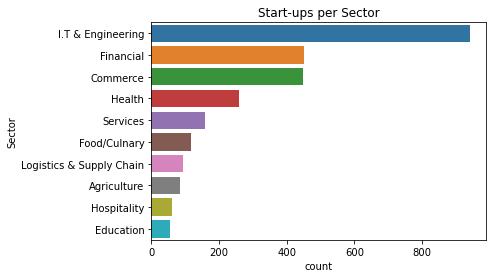

In [108]:
sns.barplot(y=startups_by_sectors[:10].index, x =(startups_by_sectors['count'])[:10]).set(title='Start-ups per Sector')

### What is the total Amount of funding per sector for each year of funding?

In [109]:
yearly_fund_sector = merged_data.groupby(['Sector','Funding Year'])['Amount($)'].agg(['sum'],ascending=False)
yearly_fund_sector

sum
Sector                   Funding Year                
Agriculture              2018             10685728.53
                         2019             21300000.00
                         2020            367280006.00
                         2021            294300040.00
Commerce                 2018           1291533677.90
                         2019            512550004.00
                         2020           2045307835.00
                         2021           6835970210.00
Conglomerate             2020           2200000000.00
Construction             2018              2641000.00
                         2019             20000000.00
                         2020              3300000.00
                         2021            238015020.00
Education                2018             16754663.17
                         2020            826053001.00
                         2021            330735030.00
Financial                2018           1809119170.21
                         2019             71200001.00
                         2020           2615063736.60
                         2021         155839580180.00
Food/Culnary             2018             49800593.56
                         2019             55400000.00
                         2020           1005948509.00
                         2021           1310292080.00
Health                   2018            202701532.86
                         2019             32300001.00
                         2020           1018347830.00
                         2021           2675670200.00
Hospitality              2018            145970888.17
                         2019            742400000.00
                         2020             78830004.00
                         2021           1171100020.00
I.T & Engineering        2018           2504713856.47
                         2019           1236783206.00
                         2020           8638416570.23
                         2021           7251325500.00
Logistics & Supply Chain 2018             26104667.17
                         2019            431800000.00
                         2020            216852704.00
                         2021           1647960050.00
Manufacturing            2018             53370792.73
                         2019             32000000.00
                         2020             15370000.00
                         2021             55170000.00
Real Estate              2018             22500000.00
                         2019             12700000.00
                         2020             79121330.00
                         2021             42150000.00
Services                 2018            451329511.17
                         2019             31000000.00
                         2020          70814406156.00
                         2021           2120645070.00
Undisclosed              2018             56428803.08

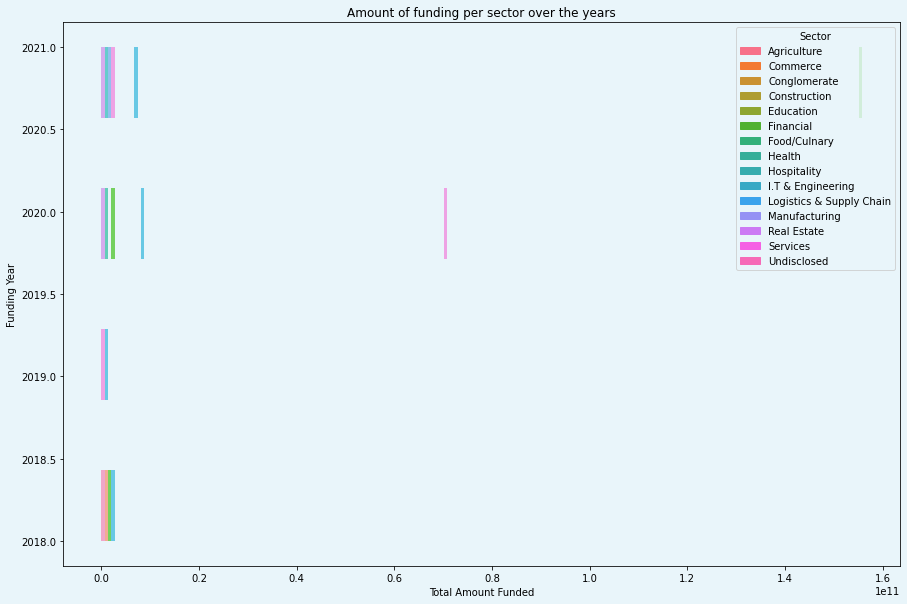

In [119]:
yearly_fund_sector = merged_data.groupby(['Sector','Funding Year'])['Amount($)'].agg(['sum'],ascending=False)
#plt.title("Amount of Funding per Sector Over the Years")
plt.figure(facecolor='#e9f5fa') 
plt.rc('axes', facecolor = '#e9f5fa')
sns.histplot(data=yearly_fund_sector, y="Funding Year", x="sum", hue="Sector").set(title='Amount of funding per sector over the years')
plt.xlabel("Total Amount Funded")
#plt.rcParams["figure.figsize"] = (15,10)
plt.show()

### What is the total amount of funding for each funding year?

In [116]:
yearly_fund = merged_data.groupby(['Funding Year'])['Amount($)'].agg(['sum'],ascending=False)
yearly_fund

,sum
Funding Year,
2018,6643654885.00
2019,3199433212.00
2020,89924297681.83
2021,179812913400.00


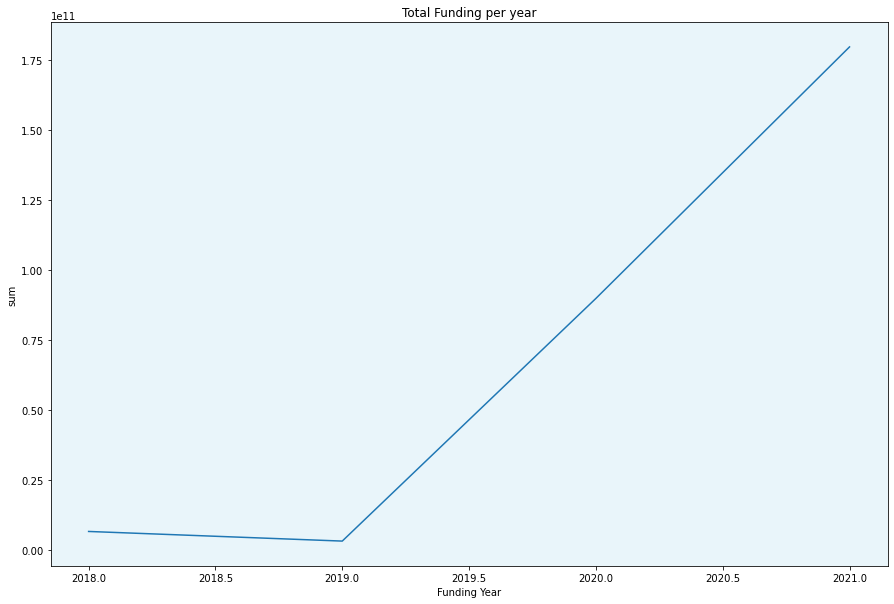

In [117]:
g = sns.lineplot(data=yearly_fund, y="sum", x="Funding Year").set(title='Total Funding per year')

### How many startups were funded each year?

In [120]:
start_up_year = merged_data.groupby(['Funding Year'])['Company/Brand'].agg(['count'],ascending=False)
start_up_year

,count
Funding Year,
2018,526
2019,84
2020,947
2021,1195


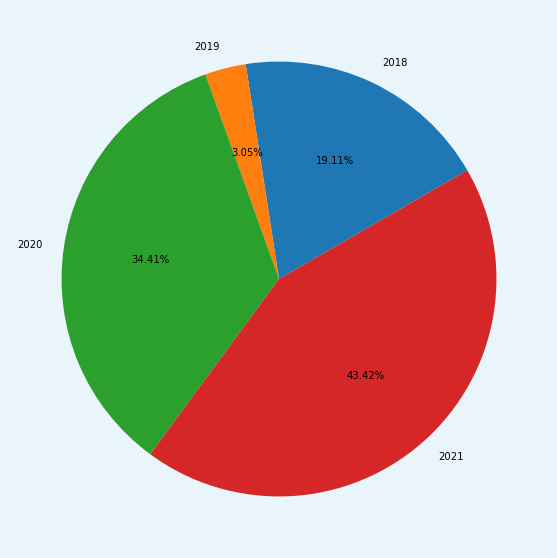

In [124]:
#sns.lineplot(data=start_up_year, y="count", x="Funding Year").set(title='Number of start-ups funded each year')
year = merged_data['Funding Year'].unique()
fig, ax = plt.subplots()
fig.set_facecolor('#E9F5FA')
ax.pie(start_up_year['count'], labels=year.tolist(), autopct='%1.2f%%', startangle=30)
plt.show()


### What is the distribution of Startups per city?

In [125]:
startup_city = merged_data.groupby(['HeadQuarter'])['HeadQuarter'].agg(['count']).sort_values('count', ascending=False)

[Text(0.5, 1.0, 'Number of start-ups per city')]

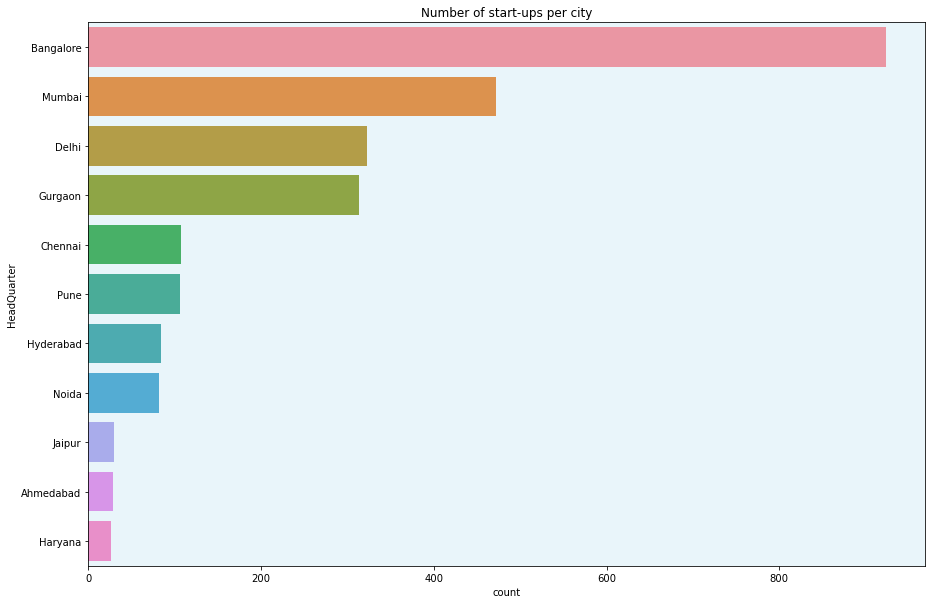

In [126]:
sns.barplot(y=startup_city[:11].index, x =(startup_city['count'])[:11]).set(title='Number of start-ups per city')

### Which is the city with the most funded start-ups?

In [127]:
funding_per_city = merged_data.groupby(['HeadQuarter'])['Amount($)'].agg(['sum']).sort_values('sum', ascending=False)
funding_per_city

,sum
HeadQuarter,
Mumbai,232022330595.85
Bangalore,25922392965.46
Gurgaon,6229907904.17
Delhi,3978602483.80
California,3078300001.00
Pune,1515256915.48
Chennai,1073579417.26
Haryana,933941255.88
Noida,598292551.30


[Text(0.5, 1.0, 'Level of Funding per City')]

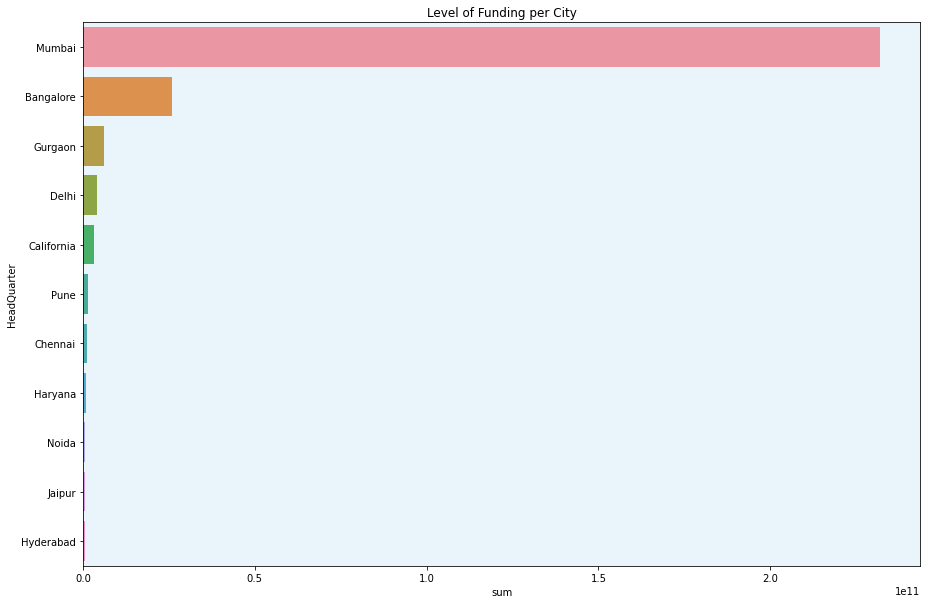

In [128]:
sns.barplot(y=funding_per_city[:11].index, x =(funding_per_city['sum'])[:11]).set(title='Level of Funding per City')

### What is the amount of funding per sector?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


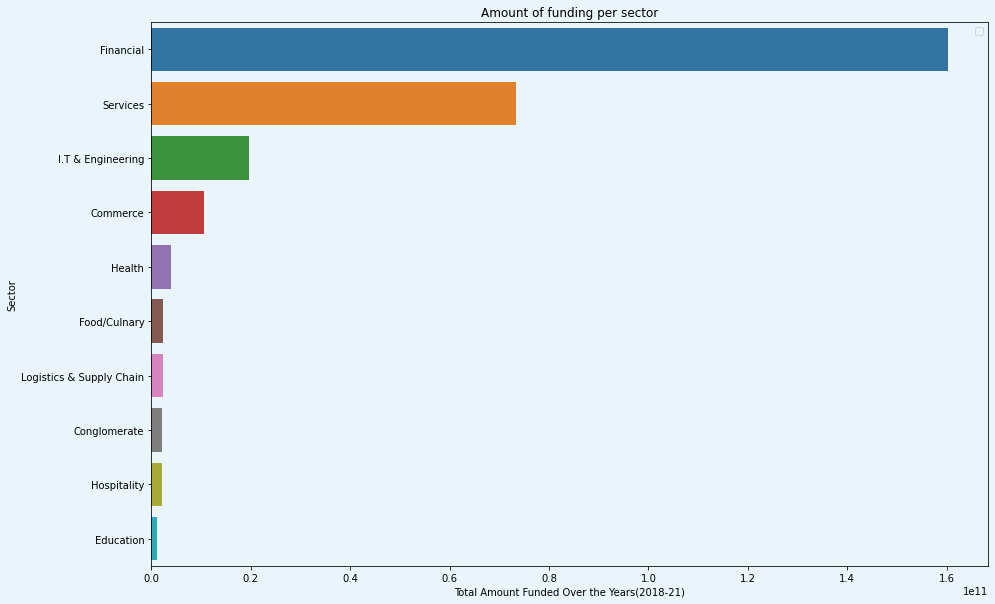

In [131]:
total_fund_sector = merged_data.groupby('Sector', sort=True)['Amount($)'].agg(['sum']).sort_values(by=['sum'],ascending=False)
plt.rc('axes', facecolor = '#e9f5fa')
plt.figure(facecolor='#e9f5fa') 
plt.rcParams["figure.figsize"] = (15,10)
sns.barplot(y=total_fund_sector[:10].index, x =(total_fund_sector['sum'])[:10]).set(title="Amount of funding per sector")
#plt.title("Amount Funded per Sector")
plt.xlabel("Total Amount Funded Over the Years(2018-21)")
plt.legend()
plt.show()

In [129]:
merged_data.to_csv('final_dataset.csv', index=False)